Dysponujemy czterema rodzajami specjalistów (typy: A, B, C, D), którzy zajmują się wykrywaniem zagrożeń. Każdy z tych specjalistów ma kompetencje do wykonywania trzech rodzajów zadań (wykrywanie i neutralizacja zagrożeń czterech typów: I, II, III). Liczby specjalistów każdego typu, którymi Centrum dysponuje, są następujące: typ A - 17, typ B - 12, typ C – 8, typ D - 10. Natomiast zapotrzebowanie na tych specjalistów do wykonania poszczególnych rodzajów zadań wynosi: zadanie I - 10, zadanie II - 15, zadanie III - 12 specjalistów dowolnego typu. Wydajność specjalistów przy wykonywaniu poszczególnych zadań (w liczbie zadań na jednostkę czasu) oraz koszty utrzymania specjalistów poszczególnych typów podano w tabeli. Jak zbudować model optymalizacyjny problemu i wykorzystać metakryterium liniowej kombinacji funkcji kryteriów

Budujemy model optymalizacyjny dla w/w problemu - określamy zmienne decyzyjne, funkcje celu oraz ograniczenia. 
W tym przypadku zmienne decyzyjne będą reprezentować liczbę specjalistów każdego typu (A, B, C, D) przydzielonych do każdego zadania (I, II, III). Funkcje celu obejmują maksymalizację wydajności pracy i minimalizację kosztów. Metakryterium jest liniową kombinacją tych funkcji celu.

Zakładamy, że mamy dwie funkcje celu:

    Maksymalizacja wydajności pracy.
    Minimalizacja kosztów utrzymania specjalistów.

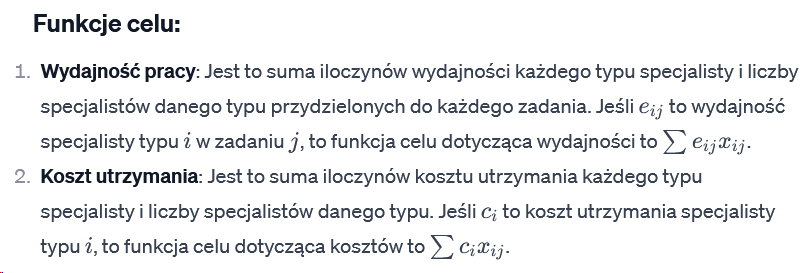

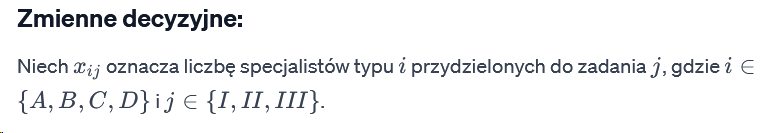

In [46]:
# imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pulp
import seaborn as sns
from pulp import LpMaximize, LpProblem, LpVariable, lpSum


In [47]:
#

# Typy specjalistów i ich liczność
specjalisci = {'A': 17, 'B': 12, 'C': 8, 'D': 10}

# Rodzaje zadań i ich zapotrzebowanie
zadania = {'I': 10, 'II': 15, 'III': 12}

# Wydajność specjalistów
wydajnosc = {
    'A': {'I': 14.0, 'II': 8.0, 'III': 15.0},
    'B': {'I': 9.0, 'II': 9.0, 'III': 10.0},
    'C': {'I': 6.0, 'II': 7.0, 'III': 6.0},
    'D': {'I': 11.0, 'II': 4.0, 'III': 9.0}
}

# Koszty utrzymania specjalistów
koszt = {
    'A': {'I': 12.0, 'II': 12.0, 'III': 18.0},
    'B': {'I': 8.0, 'II': 19.0, 'III': 14.0},
    'C': {'I': 10.0, 'II': 15.0, 'III': 11.0},
    'D': {'I': 12.0, 'II': 13.0, 'III': 14.0}
}


In [48]:
# Normalizacja
max_wydajnosc = max(max(v.values()) for v in wydajnosc.values())
min_wydajnosc = min(min(v.values()) for v in wydajnosc.values())
max_koszt = max(max(v.values()) for v in koszt.values())
min_koszt = min(min(v.values()) for v in koszt.values())



In [49]:
# Wagi
alpha = 0.5
beta = -0.5 #wymnożone przez -1

In [50]:

# Tworzenie modelu
model = pulp.LpProblem("Optymalizacja_alokacji_specjalistow", pulp.LpMaximize)


In [51]:
# Zmienne decyzyjne
x = pulp.LpVariable.dicts("x", [(i, j) for i in specjalisci.keys() for j in zadania.keys()], lowBound=0, cat='Integer')


In [52]:
print(x)

{('A', 'I'): x_('A',_'I'), ('A', 'II'): x_('A',_'II'), ('A', 'III'): x_('A',_'III'), ('B', 'I'): x_('B',_'I'), ('B', 'II'): x_('B',_'II'), ('B', 'III'): x_('B',_'III'), ('C', 'I'): x_('C',_'I'), ('C', 'II'): x_('C',_'II'), ('C', 'III'): x_('C',_'III'), ('D', 'I'): x_('D',_'I'), ('D', 'II'): x_('D',_'II'), ('D', 'III'): x_('D',_'III')}


In [53]:
import pandas as pd

# Create a DataFrame to store the values of x
x_values = pd.DataFrame(columns=zadania, index=specjalisci)

# Populate the DataFrame with the values of x
for i in specjalisci:
    for j in zadania:
        x_values.loc[i, j] = x[(i, j)].varValue

# Display the DataFrame
# print(x_values)


In [54]:
# Funkcja celu
model += alpha * sum(((wydajnosc[i][j] - min_wydajnosc) / (max_wydajnosc - min_wydajnosc)) * x[i, j]
                     for i in specjalisci for j in zadania) + \
         beta * sum(((koszt[i][j] - min_koszt) / (max_koszt - min_koszt)) * x[i, j]
                    for i in specjalisci for j in zadania)


In [55]:
# Ograniczenia
for i in specjalisci:
    model += sum(x[i, j] for j in zadania) <= specjalisci[i]

for j in zadania:
    model += sum(x[i, j] for i in specjalisci) == zadania[j]


In [56]:
# Rozwiązanie modelu
model.solve()


1

In [57]:
# Wyniki
wyniki = pd.DataFrame.from_dict(x, orient="index", 
                                columns=["Variable"])
wyniki["Optimal_Value"] = wyniki["Variable"].apply(lambda item: item.varValue)


In [58]:
from IPython.display import display

display(wyniki)


,Variable,Optimal_Value
"(A, I)","x_('A',_'I')",0.0
"(A, II)","x_('A',_'II')",15.0
"(A, III)","x_('A',_'III')",2.0
"(B, I)","x_('B',_'I')",10.0
"(B, II)","x_('B',_'II')",0.0
"(B, III)","x_('B',_'III')",2.0
"(C, I)","x_('C',_'I')",0.0
"(C, II)","x_('C',_'II')",0.0
"(C, III)","x_('C',_'III')",8.0
"(D, I)","x_('D',_'I')",0.0


In [59]:
# # Analiza wrażliwości dla kosztów utrzymania specjalisty typu A
# koszty_A = range(5, 25, 1)  # Zakładam zakres kosztów od 5 do 25 z krokiem 1
# wyniki_kosztow = []

    Koszt utrzymania specjalisty A  Wartość funkcji celu
0                                5              9.590909
1                                6              8.818182
2                                7              8.045455
3                                8              7.272727
4                                9              6.500000
5                               10              5.727273
6                               11              4.954545
7                               12              4.181818
8                               13              3.409091
9                               14              2.636364
10                              15              1.863636
11                              16              1.090909
12                              17              0.318182
13                              18             -0.227273
14                              19             -0.772727
15                              20             -1.227273
16                             

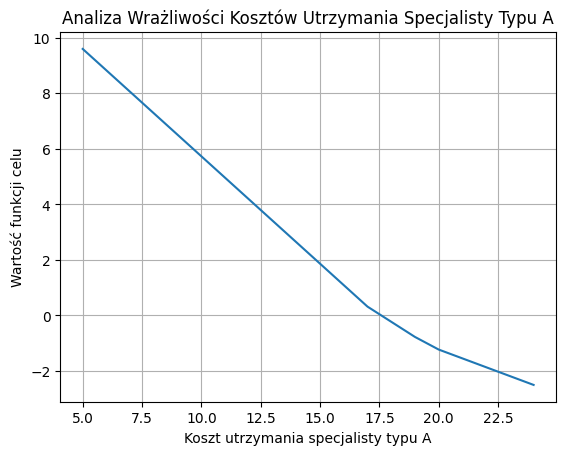

In [60]:
# Analiza wrażliwości dla kosztów utrzymania specjalisty typu A
koszty_A = range(5, 25, 1)  # Zakres kosztów od 5 do 25 z krokiem 1
wyniki_kosztow = []

for koszt_A in koszty_A:
    # Aktualizacja kosztu utrzymania specjalisty A dla każdego zadania
    for zadanie in zadania:
        koszt['A'][zadanie] = koszt_A

    # Ponowne utworzenie modelu z aktualizowanym kosztem
    model = pulp.LpProblem("Optymalizacja_alokacji_specjalistow", pulp.LpMaximize)

    # Zmienne decyzyjne
    x = pulp.LpVariable.dicts("x", [(i, j) for i in specjalisci.keys() for j in zadania.keys()], lowBound=0, cat='Integer')

    # Funkcja celu
    model += alpha * sum(((wydajnosc[i][j] - min_wydajnosc) / (max_wydajnosc - min_wydajnosc)) * x[i, j]
                         for i in specjalisci for j in zadania) + \
             beta * sum(((koszt[i][j] - min_koszt) / (max_koszt - min_koszt)) * x[i, j]
                        for i in specjalisci for j in zadania)

    # Ograniczenia
    for i in specjalisci:
        model += sum(x[i, j] for j in zadania) <= specjalisci[i]

    for j in zadania:
        model += sum(x[i, j] for i in specjalisci) == zadania[j]

    # Rozwiązanie modelu
    model.solve()
    wyniki_kosztow.append(pulp.value(model.objective))

# Tabela wyników analizy wrażliwości
tabela_wrażliwości = pd.DataFrame({
    'Koszt utrzymania specjalisty A': koszty_A,
    'Wartość funkcji celu': wyniki_kosztow
})

print(tabela_wrażliwości)

# Wykres
plt.plot(tabela_wrażliwości['Koszt utrzymania specjalisty A'], tabela_wrażliwości['Wartość funkcji celu'])
plt.xlabel('Koszt utrzymania specjalisty typu A')
plt.ylabel('Wartość funkcji celu')
plt.title('Analiza Wrażliwości Kosztów Utrzymania Specjalisty Typu A')
plt.grid(True)
plt.show()



    Wydajność specjalisty A  Wartość funkcji celu
0                         5             -4.409091
1                         6             -4.090909
2                         7             -3.772727
3                         8             -3.454545
4                         9             -3.136364
5                        10             -2.818182
6                        11             -2.500000
7                        12             -2.181818
8                        13             -1.863636
9                        14             -1.545455
10                       15             -1.227273
11                       16             -0.909091
12                       17             -0.227273
13                       18              0.454545
14                       19              1.136364
15                       20              1.909091
16                       21              2.681818
17                       22              3.454545
18                       23              4.227273


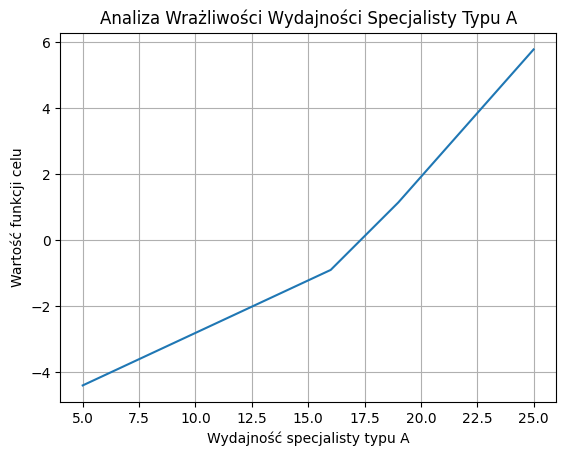

In [62]:
# Zakres analizy wydajności dla specjalisty typu A
wydajnosc_A = range(5, 26, 1)  # Zakres wydajności od 5 do 25
wyniki_wydajnosci = []

for wydajnosc_A_val in wydajnosc_A:
    # Aktualizacja wydajności specjalisty A dla każdego zadania
    for zadanie in zadania:
        wydajnosc['A'][zadanie] = wydajnosc_A_val

    # Tworzenie i rozwiązywanie modelu
    model = pulp.LpProblem("Optymalizacja_alokacji_specjalistow", pulp.LpMaximize)

    x = pulp.LpVariable.dicts("x", [(i, j) for i in specjalisci.keys() for j in zadania.keys()], lowBound=0, cat='Integer')

    model += alpha * sum(((wydajnosc[i][j] - min_wydajnosc) / (max_wydajnosc - min_wydajnosc)) * x[i, j]
                         for i in specjalisci for j in zadania) + \
             beta * sum(((koszt[i][j] - min_koszt) / (max_koszt - min_koszt)) * x[i, j]
                        for i in specjalisci for j in zadania)

    for i in specjalisci:
        model += sum(x[i, j] for j in zadania) <= specjalisci[i]

    for j in zadania:
        model += sum(x[i, j] for i in specjalisci) == zadania[j]

    model.solve()
    wyniki_wydajnosci.append(pulp.value(model.objective))

# Tabela wyników analizy wrażliwości
tabela_wrażliwości_wydajności = pd.DataFrame({
    'Wydajność specjalisty A': wydajnosc_A,
    'Wartość funkcji celu': wyniki_wydajnosci
})

print(tabela_wrażliwości_wydajności)

# Wykres
plt.plot(tabela_wrażliwości_wydajności['Wydajność specjalisty A'], tabela_wrażliwości_wydajności['Wartość funkcji celu'])
plt.xlabel('Wydajność specjalisty typu A')
plt.ylabel('Wartość funkcji celu')
plt.title('Analiza Wrażliwości Wydajności Specjalisty Typu A')
plt.grid(True)
plt.show()